In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [8]:
iris = datasets.load_iris()

# create a DataFrame using iris.data and name its columns using iris.feature_names
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# check missing values in each column of dataframe 
df.isnull()
# print total count of missing values in each column
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
#statistical details for each flower species.
df['target']=iris['target']
# add another column named species using pandas.map function for example...
species_mapping={0:iris['target_names'][0],1:iris['target_names'][1],2:iris['target_names'][2]}
df['Species'] = df['target'].map(species_mapping)
df['Species'].value_counts()
setosa = df['Species'] == 'Iris-setosa'
versicolor = df['Species'] == 'Iris-versicolor'
virginica = df['Species'] == 'Iris-virginica'


In [11]:
# Mean normalization
Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
m = df.shape[0]
n = 4
k = 3
X = np.ones((m,n + 1))
y = np.array((m,1))
X[:,1] = df['sepal length (cm)'].values
X[:,2] = df['sepal width (cm)'].values
X[:,3] = df['petal length (cm)'].values
X[:,4] = df['petal width (cm)'].values
y = df['Species'].values
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

In [12]:
# it shows 80% of data is split for training and 20% of the data goes to testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
X = df.drop(['Species'], axis=1)
y = df['Species']
# print(X.head())
print(X_train.shape)
# print(y.head())
print(y_test.shape)

(120, 5)
(30,)


Mean squared error: 2118.60
Coefficient of determination: 0.40


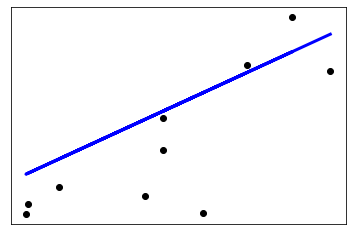

In [13]:
#Simple regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:, np.newaxis, 2]
X_train = X[:-10]
X_test = X[-10:]
y_train = y[:-10]
y_test = y[-10:]
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [1]:
#multiple linear regression
from pandas import DataFrame  
from sklearn import linear_model  
import statsmodels.api as sm  
#defining dataset
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],  
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],  
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],  
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],  
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]          
                }  
                  
df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])  
# here we have 2 variables for multiple regression.
X = df[['Interest_Rate','Unemployment_Rate']]  
Y = df['Stock_Index_Price']  
   
# generating the Multiple Linear Regression model 
regr = linear_model.LinearRegression()  
regr.fit(X, Y)  
  
print('Intercept: \n', regr.intercept_)  
print('Coefficients: \n', regr.coef_)  
  
# prediction with sklearn  
New_Interest_Rate = 2.75  
New_Unemployment_Rate = 5.3  
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))   

Intercept: 
 1798.403977625855
Coefficients: 
 [ 345.54008701 -250.14657137]
Predicted Stock Index Price: 
 [1422.86238865]


In [2]:
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
